In [31]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np
from scipy.spatial import Delaunay

import networkx as nx
import matplotlib.pyplot as plt

In [3]:
path = os.path.join('Data', 'Colegios(Continental)2020.xlsx')

data = pd.read_excel(path)

In [6]:
region = 7

data_filered = data[data['Region'] == region]

data_filered.reset_index(drop=True, inplace=True)

In [12]:
def get_adj_list(data):
    n = len(data)
    points = np.array([[data['Longitud'][i], data['Latitud'][i]] for i in range(n)])
    tri = Delaunay(points)

    edges = [[] for _ in range(n)]

    for u in tri.simplices:
        if u[1] not in edges[u[0]]:
            edges[u[0]].append(u[1])
        if u[2] not in edges[u[0]]:
            edges[u[0]].append(u[2])
        if u[0] not in edges[u[1]]:
            edges[u[1]].append(u[0])
        if u[2] not in edges[u[1]]:
            edges[u[1]].append(u[2])
        if u[0] not in edges[u[2]]:
            edges[u[2]].append(u[0])
        if u[1] not in edges[u[2]]:
            edges[u[2]].append(u[1])

    return edges

In [14]:
def get_edges(adj_list):
    edges = []
    for i in range(len(adj_list)):
        for j in adj_list[i]:
            edges.append((i, j))
    return edges

In [55]:
adj_list = get_adj_list(data_filered)
edges = get_edges(adj_list)

pos = {
    i: (data_filered['Longitud'][i], data_filered['Latitud'][i])
    for i in range(len(data_filered))
}

G = nx.Graph(edges)


In [39]:
crs = 'EPSG:4326'

In [40]:
path = os.path.join('Data', 'Regiones')
regiones = gpd.read_file(path).to_crs(crs)


In [41]:
geo = regiones[regiones['codregion'] == region].boundary

C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\3783019216.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.xlim(float(geo.bounds['minx']), float(geo.bounds['maxx']))
C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\3783019216.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.ylim(float(geo.bounds['miny']), float(geo.bounds['maxy']))


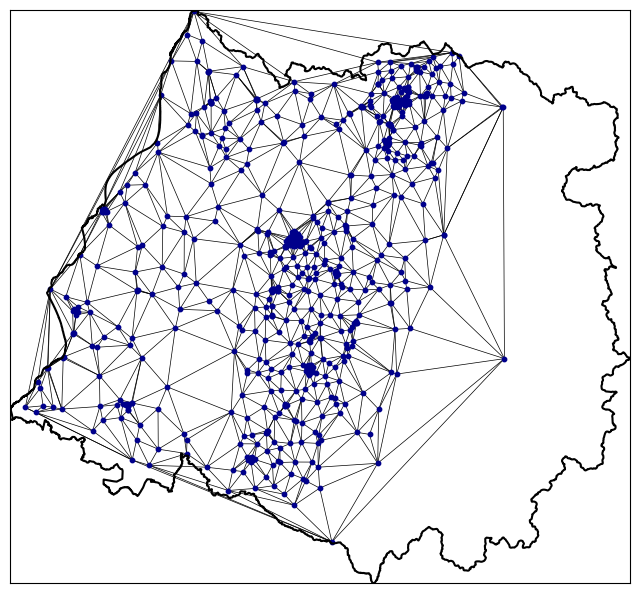

In [90]:
def plot_graph(G, pos, geo):
    options = {
        'node_color': 'darkblue',
        'node_size': 10,
        'edge_color': 'black',
        'width': 0.5
    }

    fig, ax = plt.subplots(figsize=(8, 8))

    nx.draw_networkx(G, pos, ax=ax, with_labels=False, **options)
    geo.plot(ax=ax, color='k')

    # Change the plot range
    plt.xlim(float(geo.bounds['minx']), float(geo.bounds['maxx']))
    plt.ylim(float(geo.bounds['miny']), float(geo.bounds['maxy']))

    plt.show()

plot_graph(G, pos, geo)

In [98]:
def find(u, padre):
    if u == padre[u]:
        return u
    padre[u] = find(padre[u], padre)
    return padre[u]

def union(u, v, padre, largo):

    u = find(u, padre)
    v = find(v, padre)

    if u == v:
        return
    
    if largo[u] >= largo[v]:
        padre[v] = u
        largo[u] += largo[v]
    else:
        padre[u] = v
        largo[v] += largo[u]
    
    return

def dist(u, v, data, mode='manhattan'):
    if mode == 'manhattan':
        return abs(data['Longitud'][u] - data['Longitud'][v]) + abs(data['Latitud'][u] - data['Latitud'][v])
    elif mode == 'euclidean':
        return ((data['Longitud'][u] - data['Longitud'][v])**2 + (data['Latitud'][u] - data['Latitud'][v])**2)**0.5


def MST(data):
    n = len(data)
    padre = [i for i in range(n)]
    largo = [1 for _ in range(n)]
    aristas = []
    edges = [[] for _ in range(n)]

    adj_list = get_adj_list(data)

    for i in range(n):
        for j in adj_list[i]:
            aristas.append([dist(i, j, data, mode='manhattan'), i, j])

    aristas.sort()

    for u in aristas:
        if find(u[1], padre) != find(u[2], padre):
            union(u[1], u[2], padre, largo)
            edges[u[1]].append(u[2])
            edges[u[2]].append(u[1])

    return edges

C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\3783019216.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.xlim(float(geo.bounds['minx']), float(geo.bounds['maxx']))
C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\3783019216.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.ylim(float(geo.bounds['miny']), float(geo.bounds['maxy']))


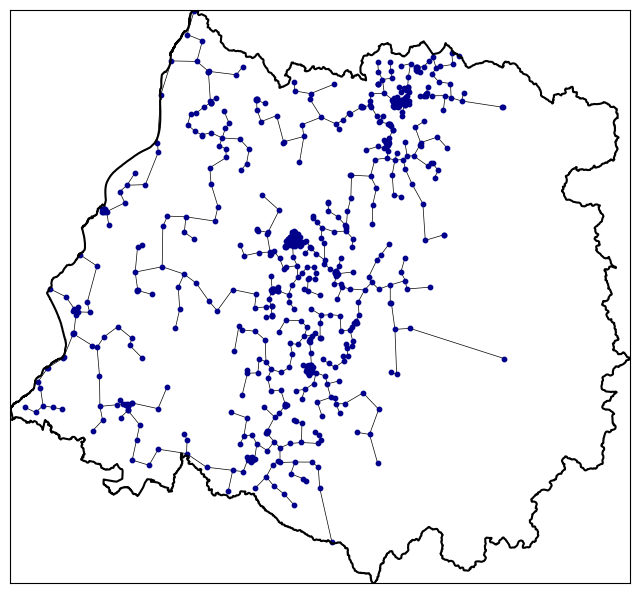

In [99]:
mst = MST(data_filered)
edges = get_edges(mst)

T = nx.Graph(edges)

plot_graph(T, pos, geo)


In [71]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [82]:
float(geo.bounds['miny']), float(geo.bounds['maxy'])

C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\1780210769.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(geo.bounds['miny']), float(geo.bounds['maxy'])


(-36.54356465637166, -34.684573939939916)

C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\3771788503.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.xlim(float(geo.bounds['minx']), float(geo.bounds['maxx']))
C:\Users\Roberto B\AppData\Local\Temp\ipykernel_3808\3771788503.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.ylim(float(geo.bounds['miny']), float(geo.bounds['maxy']))


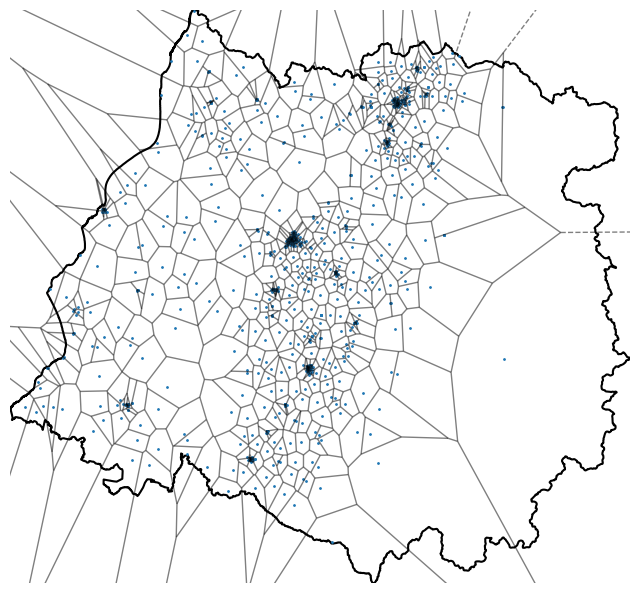

In [88]:
schools_geo = [(elem.Longitud, elem.Latitud) for elem in data_filered.itertuples()]

vor = Voronoi(schools_geo)

fig, ax = plt.subplots(figsize=(8, 8))

options_2 = {
    'line_colors': 'black', 
    'line_width': 1, 
    'line_alpha': 0.5,
    'point_size': 2,
    'point_color': 'darkblue'
}

geo.plot(ax=ax, color='k')
voronoi_plot_2d(vor, ax=ax, show_vertices=False, **options_2)

# Change the plot range
plt.xlim(float(geo.bounds['minx']), float(geo.bounds['maxx']))
plt.ylim(float(geo.bounds['miny']), float(geo.bounds['maxy']))

# Remove the axis
plt.axis('off')

plt.show()
